In [1]:
!pip install rdkit
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 32.9 MB/s eta 0:00:00


In [2]:
import sys
import os
from rdkit.Chem import RDConfig, MolFromSmiles, Draw
from rdkit.Chem.Draw import MolsToGridImage
sys.path.append(os.path.join(RDConfig.RDContribDir,'SA_Score'))
import sascorer
import pandas as pd

In [3]:
data_smiles = pd.read_csv('https://raw.githubusercontent.com/sharonlae77/useful_codes/main/data/HIV.csv')

In [4]:
data_smiles.head()

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [5]:
data_actives = data_smiles[data_smiles['HIV_active']==1].reset_index(drop=True)

In [6]:
molecule = [MolFromSmiles(i) for i in data_actives['smiles']]
sascores = [sascorer.calculateScore(mol) for mol in molecule]
df_sascore = pd.concat([data_actives,pd.DataFrame(sascores,columns=['sa_score'])],axis=1)
df_sascore_sorted = df_sascore.sort_values(by=['sa_score'])

In [7]:
top_5 = df_sascore_sorted.head(5)
bottom_5 = df_sascore_sorted.tail(5)

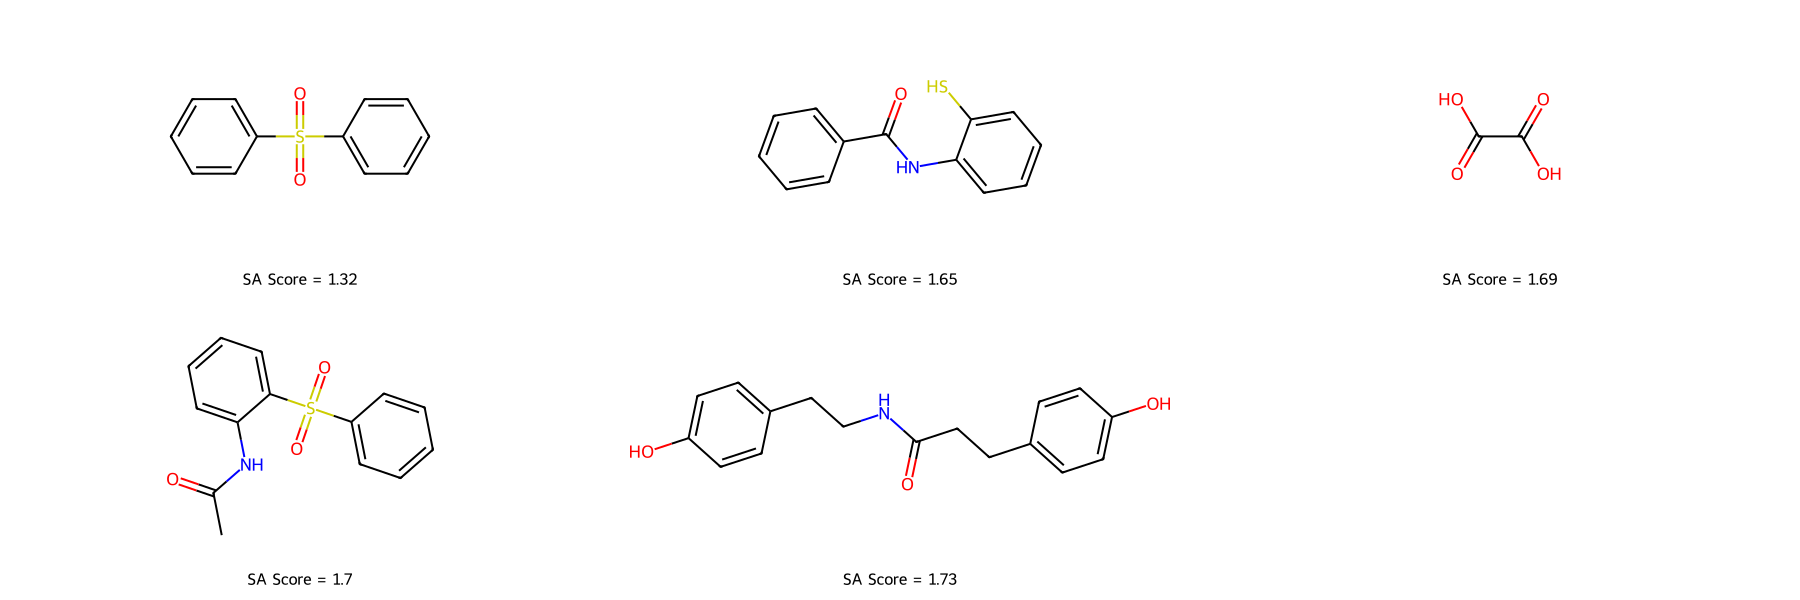

In [8]:
legends = []
mol = [MolFromSmiles(i) for i in top_5['smiles']]
for i in range(len(top_5)):
    sa_score = top_5['sa_score'].iloc[i]
    legend = f'SA Score = {round(sa_score,2)}'
    legends.append(legend)

opts = Draw.MolDrawOptions()
img = MolsToGridImage(mol,
                      subImgSize=(600, 300),
                      legends=legends,
                      returnPNG=True,
                      drawOptions=opts)
img

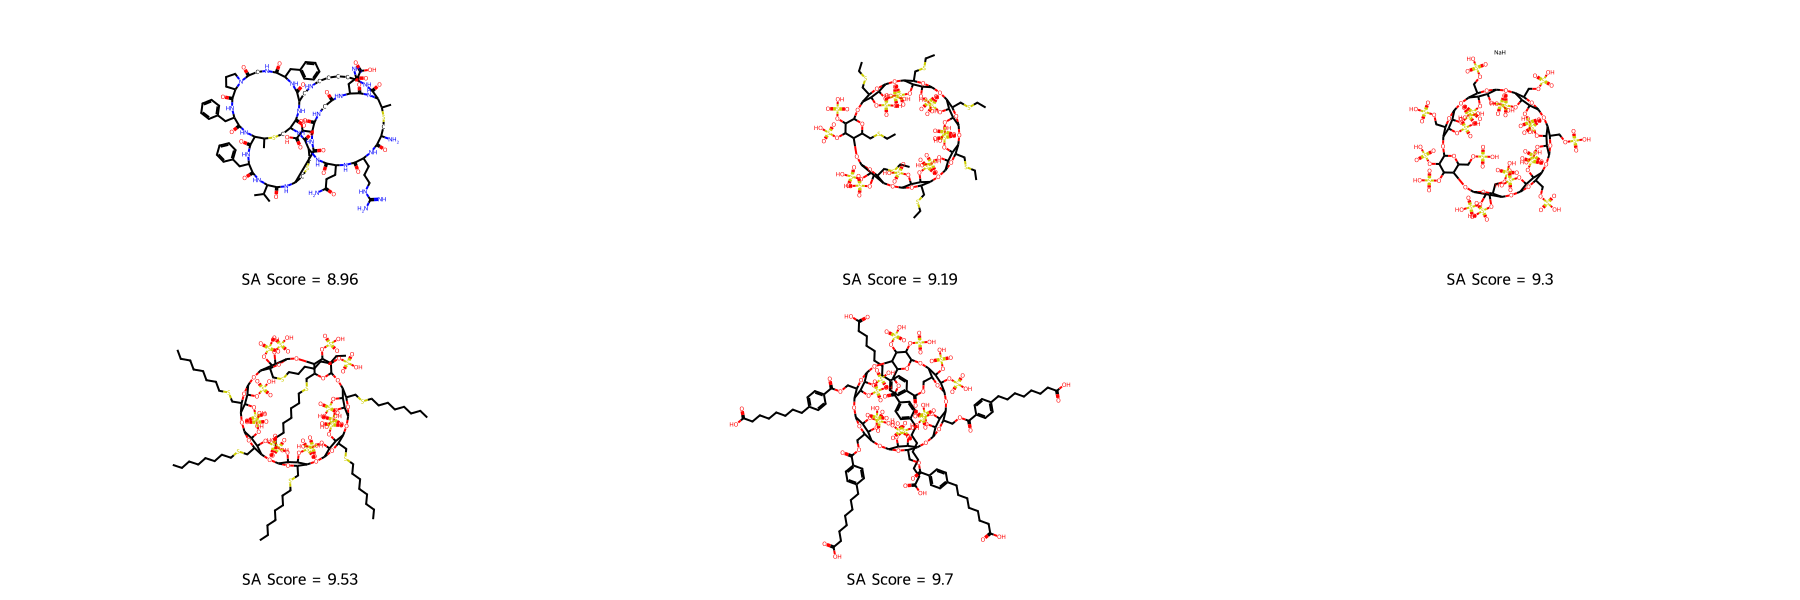

In [9]:
legends = []
mol = [MolFromSmiles(i) for i in bottom_5['smiles']]
for i in range(len(bottom_5)):
    sa_score = bottom_5['sa_score'].iloc[i]

    legend = f'SA Score = {round(sa_score,2)}'
    legends.append(legend)

opts = Draw.MolDrawOptions()
img = MolsToGridImage(mol,
                      subImgSize=(600, 300),
                      legends=legends,
                      returnPNG=True,
                      drawOptions=opts)
img